In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)

2022-06-02 10:51:58.566338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 10:51:58.566384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Zad 

Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)



170498071/170498071 [==============================] - 288s 2us/step
(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
(32, 32, 3)


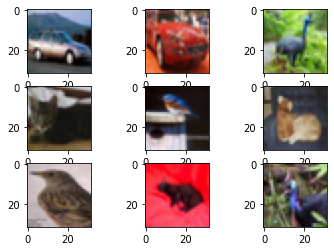

In [4]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

### Normalize

In [5]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(32, 32, 3)

# Zadanie 
Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

2022-06-02 10:56:55.081270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 10:56:55.081301: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 10:56:55.081325: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hania-dell): /proc/driver/nvidia/version does not exist
2022-06-02 10:56:55.082597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25


2022-06-02 10:56:55.451094: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 64512000 exceeds 10% of free system memory.


165/165 [==============================] - 5s 24ms/step - loss: 1.1678 - categorical_accuracy: 0.4789 - val_loss: 0.9954 - val_categorical_accuracy: 0.5937
Epoch 2/25
165/165 [==============================] - 4s 22ms/step - loss: 0.9497 - categorical_accuracy: 0.6145 - val_loss: 0.9426 - val_categorical_accuracy: 0.6154
Epoch 3/25
165/165 [==============================] - 3s 18ms/step - loss: 0.8551 - categorical_accuracy: 0.6577 - val_loss: 0.8383 - val_categorical_accuracy: 0.6697
Epoch 4/25
165/165 [==============================] - 3s 19ms/step - loss: 0.7916 - categorical_accuracy: 0.6823 - val_loss: 0.8528 - val_categorical_accuracy: 0.6606
Epoch 5/25
165/165 [==============================] - 4s 22ms/step - loss: 0.7501 - categorical_accuracy: 0.7011 - val_loss: 0.7722 - val_categorical_accuracy: 0.6811
Epoch 6/25
165/165 [==============================] - 3s 20ms/step - loss: 0.7066 - categorical_accuracy: 0.7145 - val_loss: 0.7361 - val_categorical_accuracy: 0.6994
Epoch 7/2

2022-06-02 10:58:03.764771: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 49152000 exceeds 10% of free system memory.


125/125 [==============================] - 1s 8ms/step - loss: 0.7646 - categorical_accuracy: 0.7280


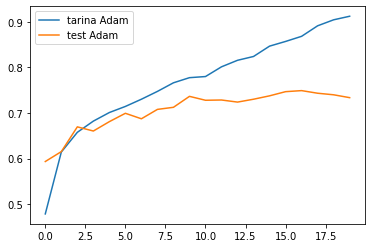

In [7]:
from keras.datasets import cifar10
from keras.utils import np_utils
seed(123)
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
nb_classes = 4
n_samples = 7000
X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
history = History()
model = Sequential()
model.add(Conv2D(6,(5,5),input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(5,5)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation="sigmoid"))
model.add(Dense(84,activation="sigmoid"))
model.add(Dense(4,activation="softmax"))
model.summary()
early_stopping = EarlyStopping(patience=10,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=25,callbacks=[early_stopping, history])
model.evaluate(X_test,y_test)
plt.plot(history.history['categorical_accuracy'], label = "tarina Adam")
plt.plot(history.history['val_categorical_accuracy'], label = "test Adam")
plt.legend()
plt.show()



In [8]:
model.predict_proba(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
model.predict_classes(X_test)

In [ ]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()